<a href="https://colab.research.google.com/github/uniyalmani/object_recognition_Ml/blob/main/object_recognition_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

In [ ]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])


model.compile(optimizer=tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
               metrics='accuracy'
              )

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5062 - accuracy: 0.8228
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3791 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3422 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3163 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2951 - accuracy: 0.8901


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.5568 - accuracy: 0.8141


In [ ]:
import numpy as np
predictions = model.predict(test_images)
predictions = [np.argmax(ele) for ele in predictions]

313/313 [==============================] - 1s 3ms/step


9


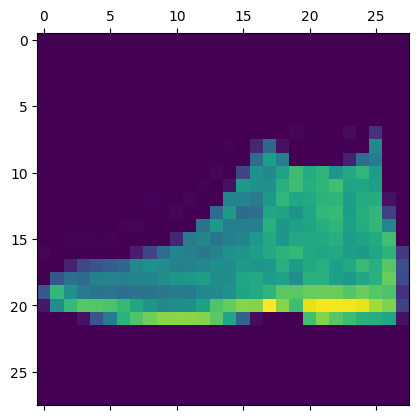

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(test_images[0]) 
print(test_lables[0])

In [ ]:
cm = tf.math.confusion_matrix(labels=test_lables, predictions=predictions)
print(cm)

tf.Tensor(
[[823   2  10  36   0   1 122   0   6   0]
 [  4 954   8  29   1   0   3   0   1   0]
 [  8   2 808   9  29   0 144   0   0   0]
 [ 33   9   9 873  12   0  63   0   1   0]
 [  0   1 316  68 415   0 195   0   5   0]
 [  3   0   0   0   0 918   8  36   7  28]
 [188   1 135  31  31   0 606   0   8   0]
 [  0   0   0   0   0  25   4 866   6  99]
 [  1   1   7   6   1   1  52   4 927   0]
 [  2   0   0   0   0  19  11  17   0 951]], shape=(10, 10), dtype=int32)


In [ ]:
print(predictions)

[[6.8037200e-17 4.1722498e-18 1.6888459e-38 ... 9.5783907e-04
  1.1901066e-16 9.9561667e-01]
 [6.9712766e-04 1.4882028e-05 9.8422819e-01 ... 1.9487316e-35
  1.8631798e-05 1.2605398e-28]
 [5.5272169e-11 9.9999994e-01 1.2021907e-10 ... 0.0000000e+00
  7.2185617e-19 0.0000000e+00]
 ...
 [2.5157710e-06 9.7240139e-08 4.6132826e-08 ... 1.4369854e-21
  9.9995965e-01 1.5193821e-27]
 [4.0141751e-10 9.9999779e-01 3.5561897e-08 ... 0.0000000e+00
  4.2938287e-13 0.0000000e+00]
 [2.2797931e-03 3.8470771e-06 5.7687894e-06 ... 1.8916161e-01
  3.2456189e-02 2.2914318e-02]]


Text(95.72222222222221, 0.5, 'Truth')

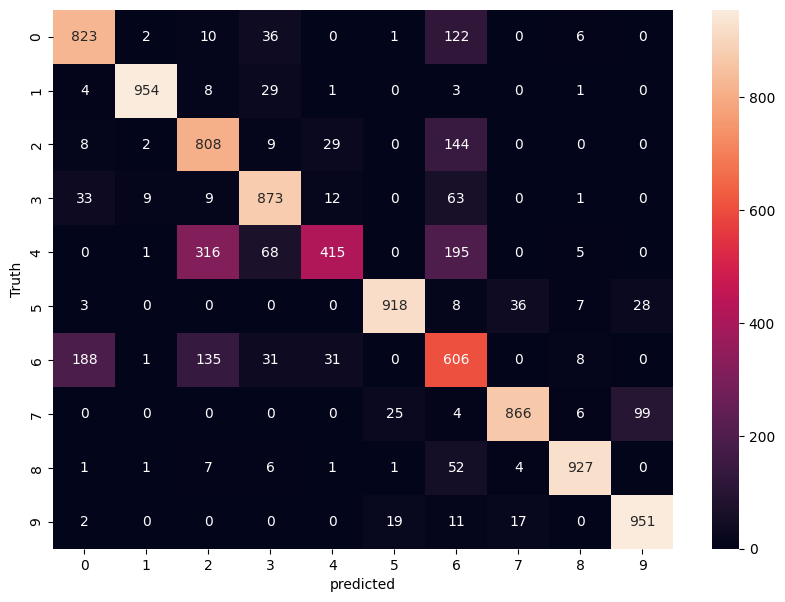

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")

# **Adding hidden layer to improve accuracy**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
               metrics='accuracy'
              )

In [ ]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 23s 11ms/step - loss: 2.1714 - accuracy: 0.7456
Epoch 2/6
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5584 - accuracy: 0.8135
Epoch 3/6
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4730 - accuracy: 0.8355
Epoch 4/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4363 - accuracy: 0.8459
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4148 - accuracy: 0.8523
Epoch 6/6
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3933 - accuracy: 0.8607


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_lables)

313/313 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8531


In [ ]:
import numpy as np
predictions = model.predict(test_images)
predictions = [np.argmax(ele) for ele in predictions]

313/313 [==============================] - 1s 4ms/step


1


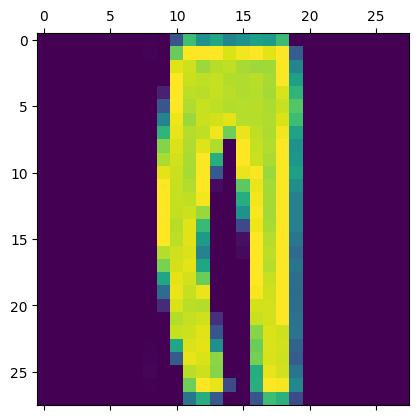

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(test_images[2]) 
print(test_lables[2])

In [ ]:
cm = tf.math.confusion_matrix(labels=test_lables, predictions=predictions)
print(cm)

tf.Tensor(
[[849   4  19  16   8   0  86   0  18   0]
 [  5 965   1  22   4   0   1   0   2   0]
 [ 21   2 839   6 100   1  28   0   3   0]
 [ 50   9  21 774 109   0  33   0   4   0]
 [  0   0 165   3 802   0  27   0   3   0]
 [  0   0   0   0   0 931   1  48   2  18]
 [164   3 173  16 119   0 510   0  15   0]
 [  0   0   0   0   0  14   0 943   0  43]
 [  2   1  10   1  12   4   4   5 961   0]
 [  0   0   0   0   0   8   1  34   0 957]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

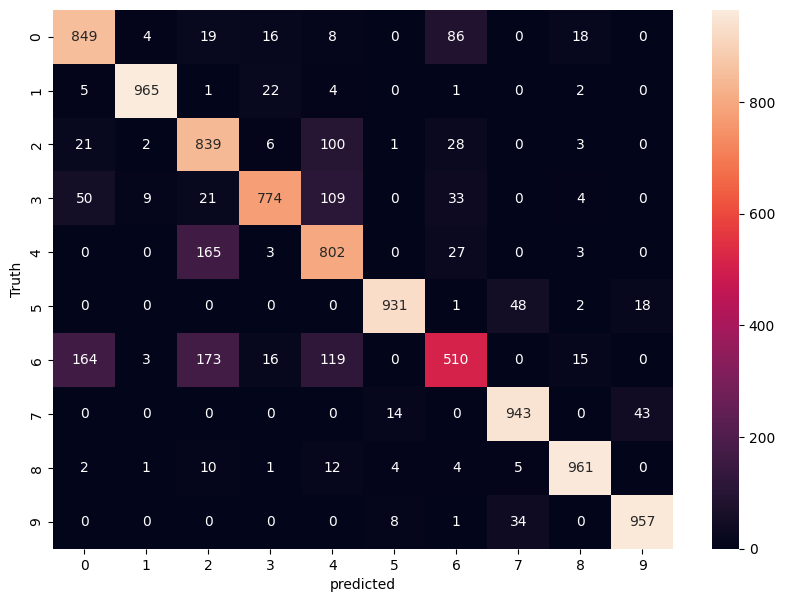

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")